# Pyber - Ride Sharing

## Observable Trends

* Urban cities have the highest number of rides and drivers but the lowest average fares
* Rural cities, on the other hand have the lowest number of rides and cities but the highest average fares
* If the comapany is looking for the best potential total fares they should expand into the Urban areas but if the are concerned about maximizing their profits per drive and driver, the Rural cities are a great place to start investing with the Suburban market a nice alternative.

In [1]:
# %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load
city_data_to_load = os.path.join ("data", "city_data.csv")
ride_data_to_load = os.path.join ("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city",how="outer")

# Display the data table for preview
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
merge_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [3]:
merge_df.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [4]:
# Set up the data set grouped by city
group_df = merge_df.groupby (["city"])


summary_index = merge_df.groupby(["city"]).mean()[["fare"]]
summary_index = summary_index.rename(columns = {"fare": "Avg fare"})
summary_index ["Numb of Rides"] = group_df.count()[["ride_id"]]
summary_index["Driver Count"] = group_df.first()[["driver_count"]]
summary_index["type"] = group_df.first()[["type"]]

summary_index.head()

,Avg fare,Numb of Rides,Driver Count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

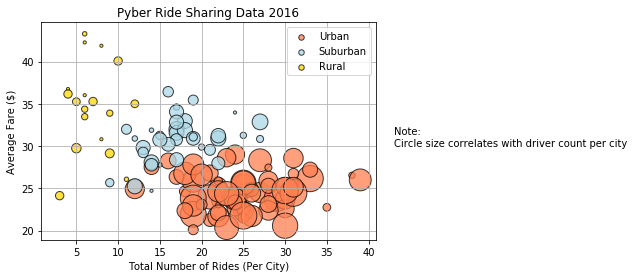

In [14]:
# Obtain the x and y coordinates for each of the three city types
Rural = summary_index.loc [summary_index ["type"] == "Rural",:]
Urban = summary_index.loc [summary_index ["type"] == "Urban",:]
Suburban = summary_index.loc [summary_index ["type"] == "Suburban",:]

# Rural.plot(kind="scatter", x="Numb of Rides", y="Avg fare", size="Driver Count", text="Rural", 
#            xTitle="Total Number of Rides (Per City)", yTitle="Average Fare ($)")
# 


# Build the scatter plots for each city types

plt.scatter(Urban[["Numb of Rides"]], Urban[["Avg fare"]], marker="o", facecolors="coral", edgecolors="black", s=Urban[["Driver Count"]]*10, alpha=0.75,  label = "Urban")
plt.scatter(Suburban[["Numb of Rides"]], Suburban[["Avg fare"]], marker="o", facecolors="lightblue", edgecolors="black", s=Suburban[["Driver Count"]]*10, alpha=0.75,  label = "Suburban")
plt.scatter(Rural[["Numb of Rides"]], Rural[["Avg fare"]], marker="o", facecolors="gold", edgecolors="black", s=Rural[["Driver Count"]]*10, alpha=0.75, label = "Rural")



# Incorporate the other graph properties
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title ("Pyber Ride Sharing Data 2016")
plt.grid()


# Create a legend
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note:\nCircle size correlates with driver count per city"
plt.text(43, 30, textstr)

# Save Figure
plt.savefig("scatter_plot.png")

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

In [7]:
# COPY OVER
# Group by Type
# type_group = merge_df.groupby ("type")

# summary_scatter = merge_df.groupby("type").count()[["ride_id"]]
# summary_scatter = summary_scatter.rename(columns = {"ride_id": "Ride Count"})
# summary_scatter ["Average Fare"] = type_group.mean()[["fare"]]

# summary_scatter.head()

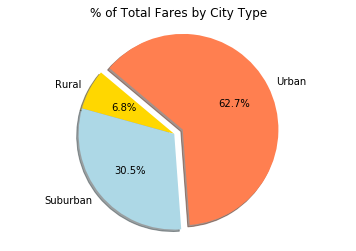

In [8]:
colors = [ "gold", "lightblue", "coral"]
explode = (0, 0, 0.1) 

# Calculate Type Percents
summary_fare = merge_df.groupby("type").sum()[["fare"]]

# Build Pie Chart
summary_fare.plot(kind="pie", y = "fare", label = "", legend = False, autopct="%1.1f%%", shadow=True, explode = explode, colors = colors, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("pie_fares.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

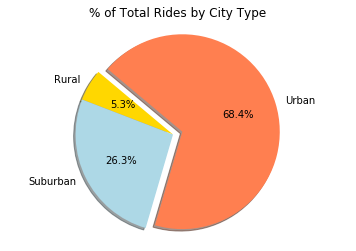

In [10]:
# Calculate Ride Percents
summary_ride = merge_df.groupby("type").count()[["fare"]]

# Build Pie Chart
summary_ride.plot(kind="pie", y = "fare", label = "", legend = False, autopct="%1.1f%%", shadow=True, explode = explode, colors = colors, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pie_rides.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

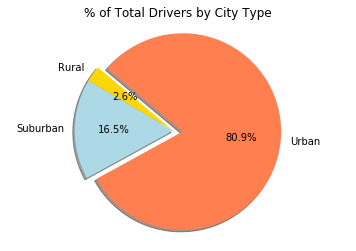

In [12]:
# Calculate Driver Percents

drive_df = merge_df.groupby (["city", "type"]).first()[["driver_count"]]
drive_df = drive_df.reset_index (drop = False)
drive_group_df = drive_df.groupby("type").sum ()[["driver_count"]]

# Build Pie Chart
drive_group_df.plot(kind="pie", y = "driver_count", label = "", legend = False, autopct="%1.1f%%", shadow=True, explode = explode, colors = colors, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pie_drivers.png")


In [13]:
# Show Figure
plt.show()

### Observable Trends are located at the top of this document